# HW2 - Trees on the Titanic

This folder contains two data files:
* titanic_sample_data has real data from real passengers from the real Titanic
* titanic_challenge is data on 20 passengers + a few fake passengers.  

Classify the people in titanic_challenge data set and tell me **WHO LIVES AND WHO DIES**

Notes:
* This is a competition.  No cheating.
* You must use either a decision tree or random forest classifier
* Remember that you are graded on your writeup.  Explain the problem, how you will solve it, and what your results mean
* Make it easy to copy and paste your predictions into a Google Spreadsheet

***

# Data Examples
Here's some code to help you get started.  Again, you won't want all this in your final report. 

We will use pandas read_csv function to load the dataset.  When we get the dataframe we can do a LOT of fun things...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('titanic_sample_data.csv')

In [3]:
df.head(n=10)

,name,pclass,sex,age,fare,survived
0,"Abbing, Mr. Anthony",3,male,42.0,7.5500,0
1,"Abbott, Master. Eugene Joseph",3,male,13.0,20.2500,0
2,"Abbott, Mr. Rossmore Edward",3,male,16.0,20.2500,0
3,"Abbott, Mrs. Stanton (Rosa Hunt)",3,female,35.0,20.2500,1
4,"Abelseth, Miss. Karen Marie",3,female,16.0,7.6500,1
5,"Abelseth, Mr. Olaus Jorgensen",3,male,25.0,7.6500,1
6,"Abelson, Mr. Samuel",2,male,30.0,24.0000,0
7,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,female,28.0,24.0000,1
8,"Abrahamsson, Mr. Abraham August Johannes",3,male,20.0,7.9250,1
9,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",3,female,18.0,7.2292,1


In [4]:
df[-5:]

,name,pclass,sex,age,fare,survived
1021,"Yrois, Miss. Henriette (""Mrs Harbeck"")",2,female,24.0,13.0000,0
1022,"Zabour, Miss. Hileni",3,female,14.5,14.4542,0
1023,"Zakarian, Mr. Mapriededer",3,male,26.5,7.2250,0
1024,"Zakarian, Mr. Ortin",3,male,27.0,7.2250,0
1025,"Zimmerman, Mr. Leo",3,male,29.0,7.8750,0


In [5]:
df.describe()

,pclass,age,fare,survived
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,2.212476,29.808480,36.530092,0.404483
std,0.839094,14.261501,55.709728,0.491031
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,21.000000,8.050000,0.000000
50%,2.000000,28.000000,15.745850,0.000000
75%,3.000000,39.000000,35.288550,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [129]:
print('% of children who survived', 100*np.mean(df['survived'][df['age'] < 18]))
print('% of adults who survived', 100*np.mean(df['survived'][df['age'] > 18]))

% of children who survived 51.65562913907284
% of adults who survived 38.70967741935484


In [130]:
df['fare'].max()

512.32920000000001

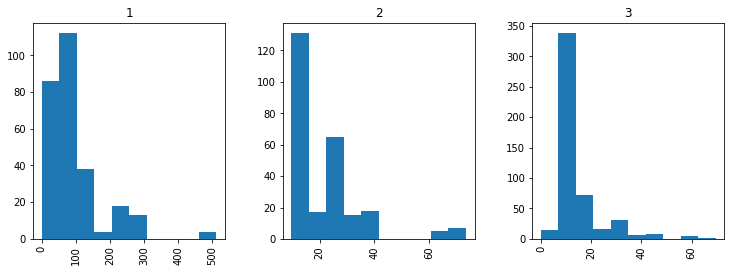

In [139]:
plt.figure()
df.hist(column='fare',by='pclass',figsize=(12,4),layout=(1,3))
plt.show()

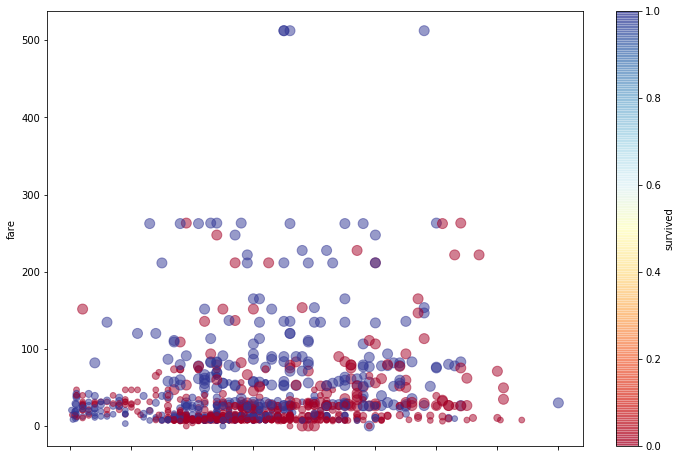

In [132]:
plt.figure()
df.plot(x='age', y='fare',kind='scatter',
        c='survived',colormap='RdYlBu',
        s=100/df['pclass'],alpha=0.5,figsize=(12,8))
plt.show()

In [7]:
# OK.  Enough messing around.  Let's get to work.
# We need make an array X with just numeric features, and y with just the category (survived)
X = df.drop(['survived','name'], axis = 1)
y = df['survived']

In [8]:
X[:5]

,pclass,sex,age,fare
0,3,male,42.0,7.55
1,3,male,13.0,20.25
2,3,male,16.0,20.25
3,3,female,35.0,20.25
4,3,female,16.0,7.65


In [10]:
X.applymap?

Signature: X.applymap(func)
Docstring:
Apply a function to a DataFrame that is intended to operate
elementwise, i.e. like doing map(func, series) for each series in the
DataFrame

Parameters
----------
func : function
    Python function, returns a single value from a single value

Examples
--------

>>> df = pd.DataFrame(np.random.randn(3, 3))
>>> df
    0         1          2
0  -0.029638  1.081563   1.280300
1   0.647747  0.831136  -1.549481
2   0.513416 -0.884417   0.195343
>>> df = df.applymap(lambda x: '%.2f' % x)
>>> df
    0         1          2
0  -0.03      1.08       1.28
1   0.65      0.83      -1.55
2   0.51     -0.88       0.20

Returns
-------
applied : DataFrame

See also
--------
DataFrame.apply : For operations on rows/columns
File:      c:\users\msd97m\appdata\local\continuum\anaconda3\lib\site-packages\pandas\core\frame.py
Type:      method


In [135]:
X['sex'] = X['sex'].apply(lambda x: 1 if x == 'male' else 0)
X[:5]

,pclass,sex,age,fare
0,3,1,42.0,7.55
1,3,1,13.0,20.25
2,3,1,16.0,20.25
3,3,0,35.0,20.25
4,3,0,16.0,7.65


In [136]:
y[:5]

0    0
1    0
2    0
3    1
4    1
Name: survived, dtype: int64

In [137]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
clf.score(X,y)

0.97660818713450293

Name: Dr D  
Class: Pattern Recognition Spring 2018

# TITLE 
A one-sentance summary of what happens here

## Problem Description
goes here


## Solution Method
Your plan of attack.  Explain what you are going do to solve the stated problem.


## Input
Load and pre-process data

## Analysis
Do all the work here


## Results
Produce the lovely plots and/or data tables that best visualization your solution

## Discussion
Explain and interpret your results.  Explain how your results solve the problem.  Also describe anything interesting you discovered along the way, or lessons learned, or how you overcame problems you encountered.     